In [1]:
# initial setup
try:
    # settings colab:
    import google.colab
    
    # si usan colab, deben cambiar el token de esta url
    #! mkdir -p ../data
    # los que usan colab deben modificar el token de esta url:
    #! wget -O ../data/properati_2017.csv https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_students_2020/master/M2/CLASE_07_Pandas_2/Data/resultado-de-encuestas-2017-2018.csv?token=AA4GFHO3EKGWGILBCV4BISC6WR6B4
    
except ModuleNotFoundError:    
    # settings local:
    %run "common/base_setup.py"

Running command `conda list`... ok
pandas=1.0.3 already installed
matplotlib=2.2.2 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed
ipywidgets=7.5.1 already installed
pytest=5.3.4 already installed
chardet=3.0.4 already installed
plotly=4.6.0 already installed
Running command `conda install --yes chart-studio=1.1.0`... error
    
PackagesNotFoundError: The following packages are not available from current channels:

  - chart-studio=1.1.0

Current channels:

  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.





## Carga Inicial del Dataset

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import random

In [75]:
# low_memorybool, default True
# Internally process the file in chunks, resulting in lower memory use while parsing, 
# but possibly mixed type inference. To ensure no mixed types either set False, 
# or specify the type with the dtype parameter. 
# Note that the entire file is read into a single DataFrame regardless, 
# use the chunksize or iterator parameter to return the data in chunks. (Only valid with C parser).
raw_data = pd.read_csv("./data/properati-fase5.csv", sep = ",", low_memory=False)
raw_data.shape

(73489, 20)

En nuestro caso, decidimos que vamos a trabajar sobre **Capital Federal** así que lo primero que haremos será cortar el dataset original para quedarnos con los datos relevantes a nuestro estudio.

In [76]:
data = raw_data[raw_data['c_estado'] == 'Capital Federal']
data.describe()

,id,superficie_total,superficie_cubierta,precio_m2_usd,floor,rooms,c_lat,c_lng,pileta,parrilla,quincho,patio,cochera,balcon,amenities,dist_subte
count,23857.000000,23857.000000,22933.000000,23857.000000,6553.000000,19325.000000,23571.000000,23571.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23571.000000
mean,60923.861131,84.205641,71.594051,2407.266754,5.069129,3.016248,-34.600289,-58.437758,0.239049,0.276020,0.035797,0.194576,0.358805,0.524374,1.628621,0.945102
std,34138.194150,68.567006,65.159605,716.168347,46.387469,32.233199,0.036568,0.051452,0.426512,0.447036,0.185787,0.395882,0.479660,0.499416,1.291085,4.177809
min,0.000000,12.000000,0.000000,232.354144,0.000000,1.000000,-38.416097,-63.616672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000493
25%,32263.000000,42.000000,37.000000,1950.943396,0.000000,2.000000,-34.620674,-58.465337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.280266
50%,60120.000000,59.000000,52.000000,2382.716049,1.000000,3.000000,-34.600010,-58.440032,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.594833
75%,88048.000000,97.000000,82.000000,2852.676338,3.000000,4.000000,-34.581417,-58.405642,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.052615
max,121219.000000,434.000000,4000.000000,4341.463415,2509.000000,4000.000000,-34.534530,-58.354956,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,622.811786


Y removemos los *outliers* de las columnas que utilizaremos más adelante:

In [77]:
data = data[data['dist_subte'] < 600]
data = data[data['rooms'] < 10]
data.dropna(subset=['dist_subte'], inplace=True)
data.describe()

,id,superficie_total,superficie_cubierta,precio_m2_usd,floor,rooms,c_lat,c_lng,pileta,parrilla,quincho,patio,cochera,balcon,amenities,dist_subte
count,19089.000000,19089.000000,18555.000000,19089.000000,5736.000000,19089.000000,19089.000000,19089.000000,19089.000000,19089.000000,19089.000000,19089.000000,19089.000000,19089.000000,19089.000000,19089.000000
mean,55917.455655,84.099421,71.614086,2387.303617,5.598152,2.687883,-34.601002,-58.437358,0.229923,0.279690,0.036461,0.201844,0.370737,0.550579,1.669234,0.916952
std,33650.759411,65.617914,64.823764,713.124846,49.550975,1.305543,0.026398,0.038781,0.420794,0.448859,0.187439,0.401387,0.483015,0.497448,1.286568,1.031519
min,0.000000,12.000000,0.000000,232.354144,0.000000,1.000000,-34.698136,-58.544722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000493
25%,27911.000000,43.000000,39.000000,1931.818182,0.000000,2.000000,-34.620990,-58.465425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.282618
50%,52042.000000,62.000000,54.000000,2361.111111,1.000000,3.000000,-34.600795,-58.438921,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.576500
75%,81318.000000,97.000000,83.000000,2828.947368,3.000000,4.000000,-34.583330,-58.405595,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.036733
max,121153.000000,434.000000,4000.000000,4341.463415,2509.000000,9.000000,-34.534530,-58.354956,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.990312


Verificamos algunas relaciones que, según creemos, deberían ser evidentes:

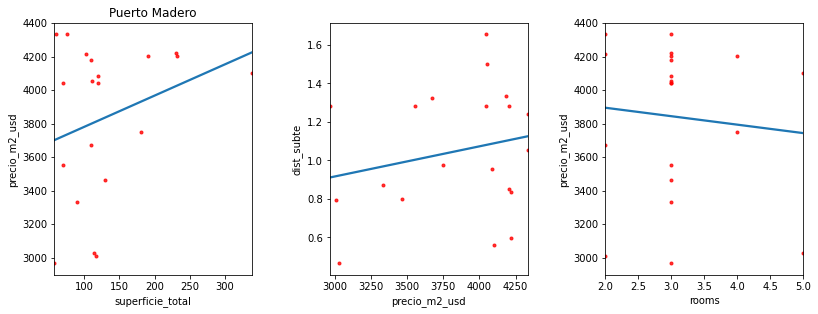

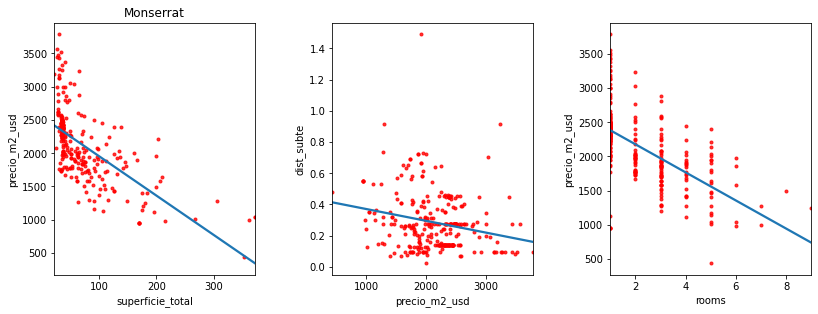

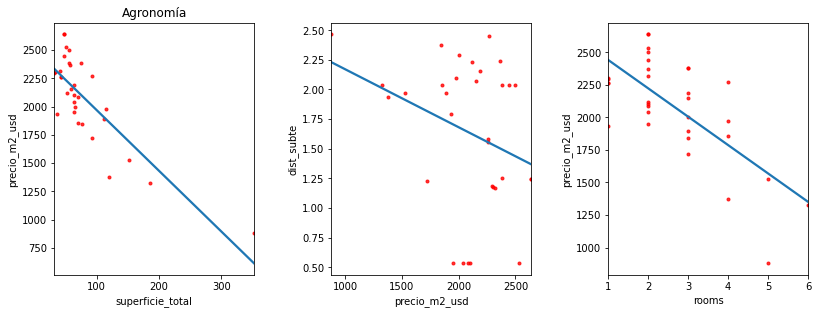

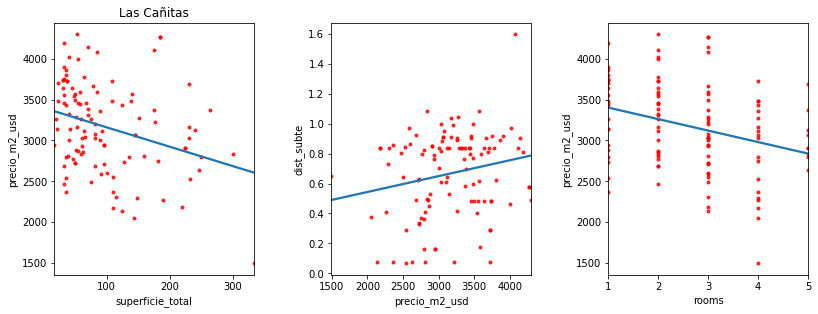

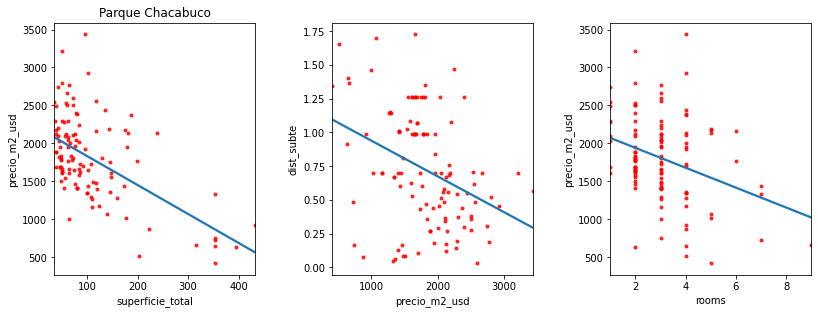

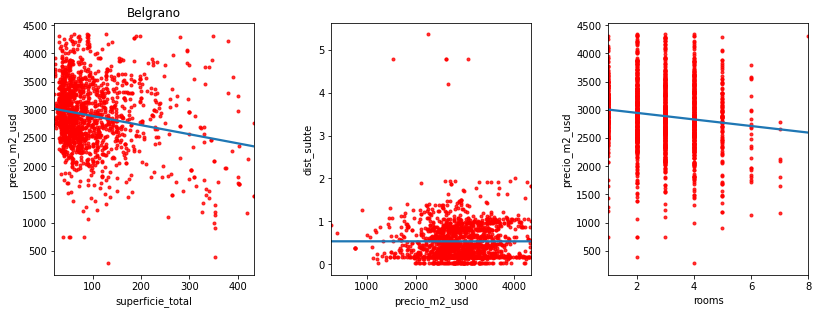

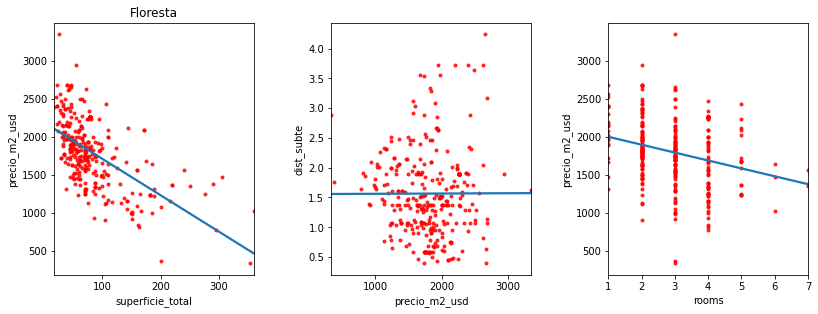

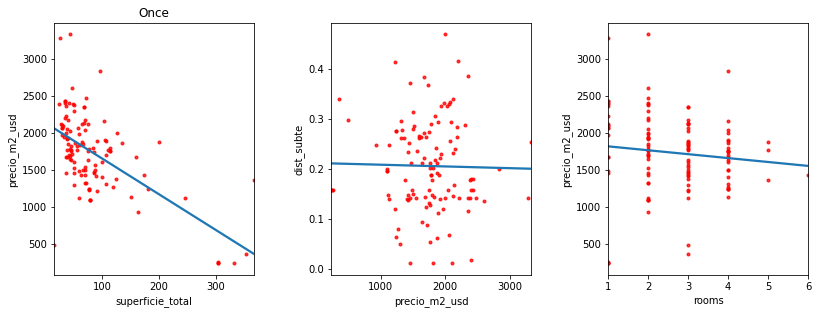

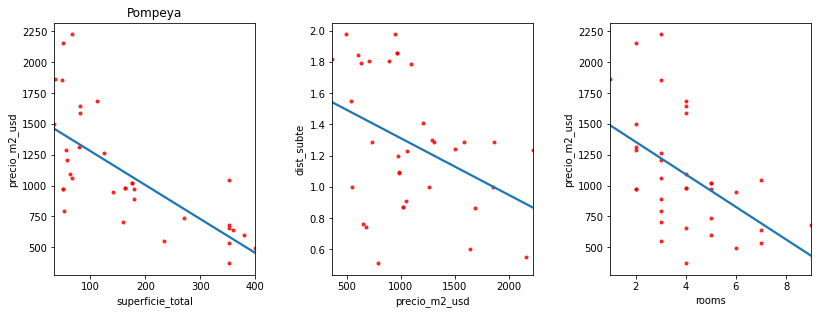

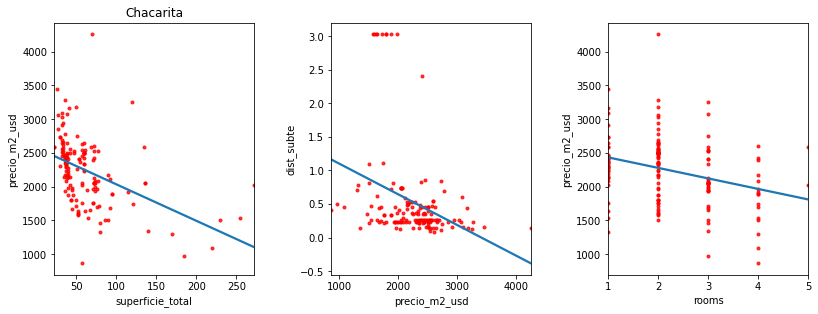

In [135]:
def plotrel(ds, loc):
    pm = ds[ds['c_localidad'] == loc]
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5), sharey=False)
    ax1.set_title(loc)
    sns.regplot(
        pm['superficie_total'],
        pm['precio_m2_usd'],
        order=1,
        ci=None,
        scatter_kws={'color':'r', 's':9},
        ax=ax1)
    sns.regplot(
        pm['precio_m2_usd'],
        pm['dist_subte'],
        order=1,
        ci=None,
        scatter_kws={'color':'r', 's':9},
        ax=ax2)
    sns.regplot(
        pm['rooms'],
        pm['precio_m2_usd'],
        order=1,
        ci=None,
        scatter_kws={'color':'r', 's':9},
        ax=ax3)
    fig.tight_layout(pad=3.0)

places = list(data['c_localidad'].unique())
for s in random.sample(places, 10):
    plotrel(data, s)

Luego de varias ejecuciones, podemos identificar correlaciones negativas entre la superficie total y la cantidad de ambientes respecto del precio por metro cuadrado.

Respecto del subte, no identificamos un patrón predominante.

### Algunos preparativos
Creamos una función que nos permita evaluar el error medio cuadrático **rmse** de los modelos de regresión:

In [89]:
### La idea es realizar corridas con sets de entrenamiento randomizados,
### por lo cual la meidicion de la eficiencia de los modelos siempre va a cambiar.
def train_test_rmse(data, feature_cols):
    X = data[feature_cols]
    y = data.precio_m2_usd
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print ("y_test sample: ", y_test.values[0:10])
    print ("y_pred sample: ", y_pred[0:10].astype(int))
    print ('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE: ', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:  ', metrics.r2_score(y_test, y_pred))
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Creamos un par de columnas adicionales:

In [79]:
data['superficie_cuadrado'] = data['superficie_total'] * data['superficie_total']
data['superficie_cubo']     = data['superficie_total'] * data['superficie_cuadrado']

# recuperamos la columna 'grupo'
counts = data.groupby('c_estado').size()
groups = [name for name, value in counts.items() if value > 999]
data['grupo'] = [value if value in groups else 'Otros' for value in data['c_estado']]
data['grupo'] = data['grupo'].astype('category')

Y creamos las columnas *dummies* pertinentes:

In [80]:
data_tipo  = pd.get_dummies(data['property_type'], drop_first=True, prefix='tipo')
data_grupo = pd.get_dummies(data['grupo'], drop_first=True, prefix='grupo')
data_localidad = pd.get_dummies(data['c_localidad'], drop_first=True, prefix='loc')
data = pd.concat([data, data_tipo, data_grupo, data_localidad], axis=1)
data.shape

(19089, 82)

A continuación, lo que haremos será evaluar modelos de regresión sobre varios conjuntos de *features* o *variables*.

## Grupo 1 - Features

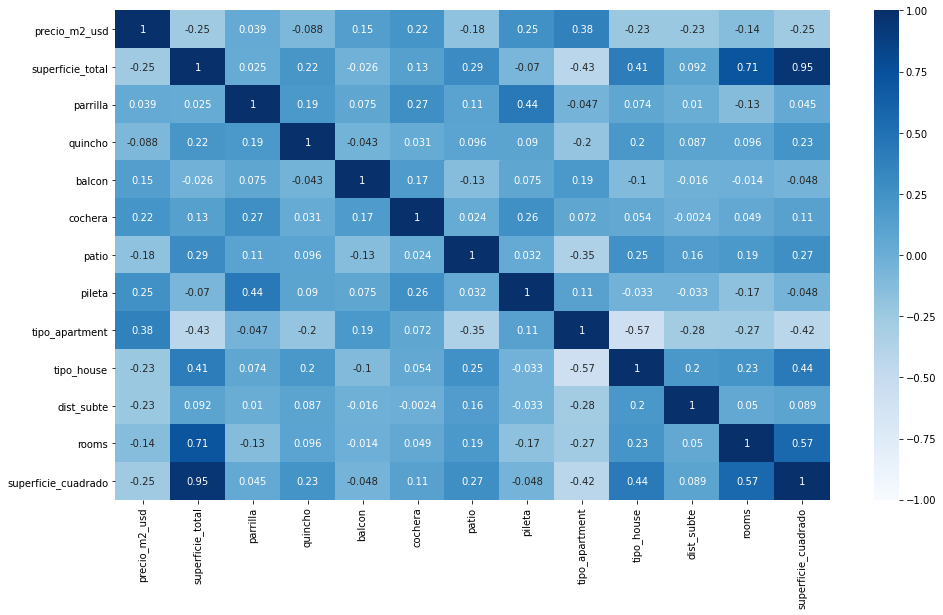

In [81]:
features_lr = [
    'superficie_total',
    'parrilla',
    'quincho',
    'balcon',
    'cochera',
    'patio',
    'pileta',
    'tipo_apartment',
    'tipo_house',
    'dist_subte',
    'rooms',
    'superficie_cuadrado',
]

plt.figure(figsize=(16,9))
sns.heatmap(data[['precio_m2_usd'] + features_lr].corr(), annot=True, vmin=-1, cmap='Blues')

No se identifican fuertes correlaciones entre las variables de interés, excepto por *rooms* (o habitaciones) y *superficie*.

Es decir, cuanto más grande es el terreno más grande será la casa y más habitaciones tendrá.

In [82]:
_ = train_test_rmse(data, features_lr)
print("")
_ = train_test_rmse(data, features_lr)
print("")
_ = train_test_rmse(data, features_lr)

y_test sample:  [1793.47826087 1638.88888889 1175.         1534.09090909 3515.15151515
 2690.          651.76117246  775.86206897 1634.61538462 2888.88888889]
y_pred sample:  [2211 2414 1649 2462 3069 2835 1198 1757 2433 2960]
MAE:  482.78631059188547
MSE:  381180.14582005574
RMSE: 617.3978829086278
R2:   0.24786208416890199

y_test sample:  [2125.         2780.48780488 2250.         2133.89121339 2300.
 2211.53846154 1576.92307692 1221.31147541 2461.53846154 2148.48484848]
y_pred sample:  [2374 2404 2277 2258 2579 2045 2072 1276 2956 2030]
MAE:  474.99691039318907
MSE:  372681.242216202
RMSE: 610.4762421390385
R2:   0.25655598886897024

y_test sample:  [ 950.         3244.89795918 2000.         1285.71428571 2345.72527473
 2000.         2258.90410959 2187.5        2337.5        2678.57142857]
y_pred sample:  [1600 2688 2237 2179 2461 1732 2477 2337 2187 2834]
MAE:  485.2071514625231
MSE:  379441.2327116035
RMSE: 615.988013447992
R2:   0.26175768571612046


Los **R2** son muy bajos.

## Grupo 2 - Barrios

In [83]:
localidades_lr = list(
    filter(lambda x: x in data.columns, map(
        lambda x: "loc_" + x, data['c_localidad'].unique())))

Este heatmap lo hacemos en 3 partes para facilitar la visualización:

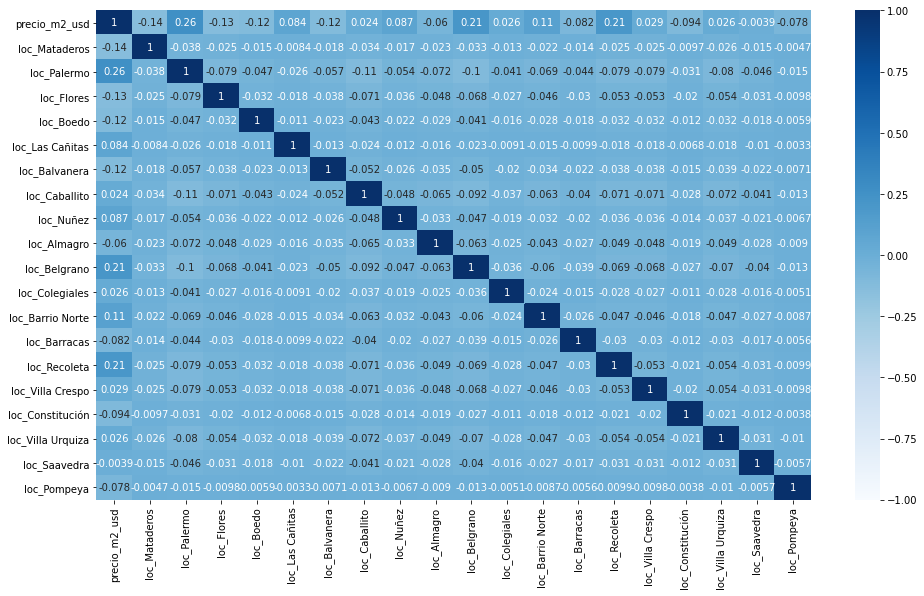

In [84]:
cutter = len(localidades_lr) // 3
localidades_lr_1 = localidades_lr[0:cutter * 1]
plt.figure(figsize=(16,9))
sns.heatmap(data[['precio_m2_usd'] + localidades_lr_1].corr(), annot=True, vmin=-1, cmap='Blues')

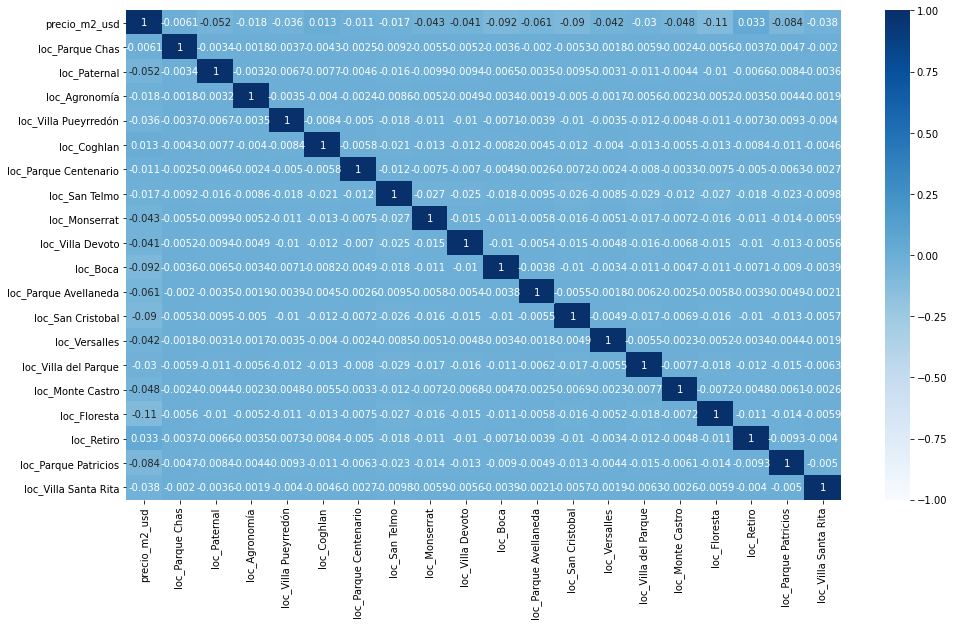

In [85]:
localidades_lr_2 = localidades_lr[cutter*1:cutter*2]
plt.figure(figsize=(16,9))
sns.heatmap(data[['precio_m2_usd'] + localidades_lr_2].corr(), annot=True, vmin=-1, cmap='Blues')

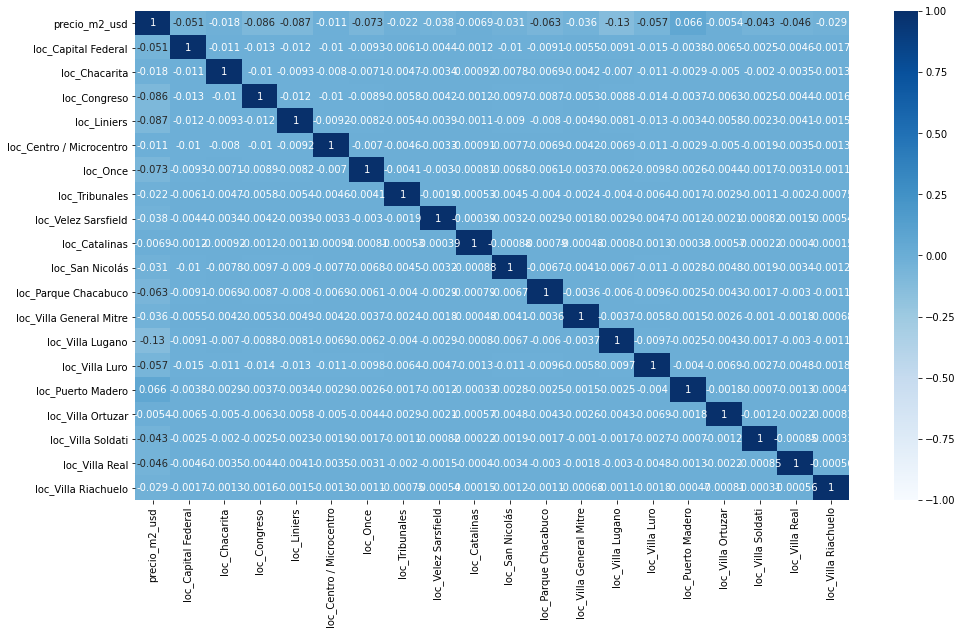

In [86]:
localidades_lr_3 = localidades_lr[cutter*2:]
plt.figure(figsize=(16,9))
sns.heatmap(data[['precio_m2_usd'] + localidades_lr_3].corr(), annot=True, vmin=-1, cmap='Blues')

En este caso, tampoco se observan fuertes correlaciones entre el barrio y el precio por metro cuadrado aunque podemos ver qué zonas tienden a ser más caras que otras.

Por ejemplo, *Puerto Madero*, *Nuñez* y *Las Cañitas* tienen (dentro de lo bajo) las correlaciones más altas con el precio por metro cuadrado.

In [87]:
_ = train_test_rmse(data, localidades_lr)
print("")
_ = train_test_rmse(data, localidades_lr)
print("")
_ = train_test_rmse(data, localidades_lr)

y_test sample:  [1600.         1284.58106383 2500.         1985.29411765 3444.44444444
 2736.7816092  1684.21052632 1817.64705882 1896.55172414 2457.44680851]
y_pred sample:  [2435 2926 2795 2435 2451 2435 2435 2186 1856 2435]
MAE:  430.88603593284614
MSE:  315957.89565330086
RMSE: 562.1013215189063
R2:   0.36582257692214004

y_test sample:  [2142.85714286 1360.         2066.66666667 3012.14285714 2842.17647059
 1860.46511628 2790.38461538  269.20570167 3185.18518519 2490.90909091]
y_pred sample:  [2232 1623 1826 2897 2358 1945 2225 1492 2435 2451]
MAE:  436.176635633579
MSE:  322844.93788436207
RMSE: 568.1944542886371
R2:   0.3696978136307745

y_test sample:  [1925.37313433 1267.54385965 1740.         3289.47368421 2575.75757576
 1508.30508475 3538.46153846 1911.11111111 2000.         1441.44144144]
y_pred sample:  [1807 1808 2443 2886 2933 2084 2933 2173 2798 1976]
MAE:  429.65570414161465
MSE:  308852.3968790766
RMSE: 555.7449027018391
R2:   0.39401462105456275


En este caso, los **R2** siguen siendo bajos.

## Grupo 3 - Barrios + Features

In [88]:
lr_all = features_lr + localidades_lr
_ = train_test_rmse(data, lr_all)
print("")
_ = train_test_rmse(data, lr_all)
print("")
_ = train_test_rmse(data, lr_all)

y_test sample:  [1964.28571429 2762.34693878 1583.33333333 3333.33333333 3334.94117647
 2500.         1265.82278481 2062.5        3125.         2200.        ]
y_pred sample:  [2321 2357 2029 3379 3639 2499 2005 2369 2426 2164]
MAE:  365.3567852779816
MSE:  225862.4527250616
RMSE: 475.2498845082044
R2:   0.5403893338719657

y_test sample:  [2083.33333333 1035.24229075 2176.47058824 2297.2972973  2608.69565217
 2549.01960784 2928.57142857 1785.71428571 2285.71428571 3970.79591837]
y_pred sample:  [1929 1191 2752 2222 3166 2397 2723 2550 2507 2660]
MAE:  367.7546808765483
MSE:  231247.05773960217
RMSE: 480.88154231536294
R2:   0.5370050983583852

y_test sample:  [2000.         2358.92857143  453.3990765  3266.66666667 1341.46341463
 2529.64444444 1518.46153846 1995.05263158 2625.         3161.76470588]
y_pred sample:  [1955 2086  831 2956 1508 2659 1612 2153 3078 2664]
MAE:  364.39945046610575
MSE:  225728.19732172095
RMSE: 475.1086163412751
R2:   0.5482858222906744


Luego de varias pruebas, concluimos que encontramos un **R2** de entre 0.51 y 0.57 y un **MAE** de entre 360 y 368.

## Mejora de la Eficiencia del Modelo

El objetivo en esta sección es tratar de mejorar las predicciones quitando variables que no aporten al modelo.

Creamos una función que nos resuma las métricas necesarias para evaluar el **p value**.

In [92]:
def statsmodel_linear(data, features):
    X = data[features]
    y = data[["precio_m2_usd"]]
    X = sm.add_constant(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
    model = sm.OLS(y_train, X_train).fit()
    predictions = model.predict(X_test)
    plt.plot(y_test,y_test, '-.', c='grey')
    plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
    plt.xlabel("Predicciones usando features")
    plt.ylabel("Valores reales precio m2")
    plt.show()
    print (model.summary())
    print ('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print ('MSE:', metrics.mean_squared_error(y_test, predictions))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    return metrics.mean_absolute_error(y_test, predictions), metrics.r2_score(y_test,predictions)

Evaluamos con algunas corridas:

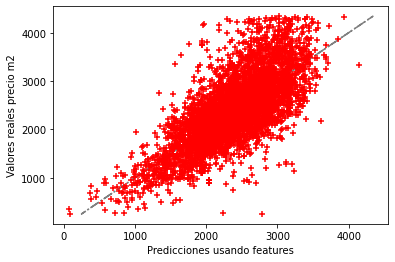

                            OLS Regression Results                            
Dep. Variable:          precio_m2_usd   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     263.9
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:18:04   Log-Likelihood:            -1.0854e+05
No. Observations:               14316   AIC:                         2.172e+05
Df Residuals:                   14246   BIC:                         2.178e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [94]:
mae1, rmse1 = statsmodel_linear(data, lr_all)

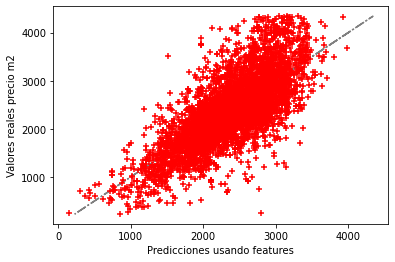

                            OLS Regression Results                            
Dep. Variable:          precio_m2_usd   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     254.2
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:18:53   Log-Likelihood:            -1.0856e+05
No. Observations:               14316   AIC:                         2.173e+05
Df Residuals:                   14246   BIC:                         2.178e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [95]:
mae2, rmse2 = statsmodel_linear(data, lr_all)

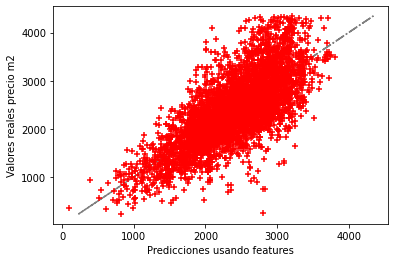

                            OLS Regression Results                            
Dep. Variable:          precio_m2_usd   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     256.9
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:19:19   Log-Likelihood:            -1.0870e+05
No. Observations:               14316   AIC:                         2.175e+05
Df Residuals:                   14246   BIC:                         2.181e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [96]:
mae3, rmse3 = statsmodel_linear(data, lr_all)

In [97]:
print('MAE promedio: ', (mae1 + mae2 + mae3) / 3)
print('R2  promedio: ', (rmse1 + rmse2 + rmse3) / 3)

MAE promedio:  367.6358297592048
R2  promedio:  0.5358950062239652


De las corridas anteriores, identificamos varias variables problematicas. Son aquellas que cumplen con **p > 0.1** en todas las ejecuciones.

In [100]:
trash = [
    'balcon',
    'tipo_house',
    'loc_Agronomía',
    'loc_Almagro',
    'loc_Capital Federal',
    'loc_Catalinas',
    'loc_Chacarita',
    'loc_Centro / Microcentro',
    'loc_Coghlan',
    'loc_Parque Chacabuco',
    'loc_Monserrat',
    'loc_Parque Centenario',
    'loc_Parque Chas',
    'loc_Paternal',
    'loc_Saavedra',
    'loc_San Cristobal',
    'loc_San Nicolás',
    'loc_San Telmo',
    'loc_Tribunales',
    'loc_Velez Sarsfield',
    'loc_Versalles',
    'loc_Villa General Mitre',
    'loc_Villa Pueyrredón',
    'loc_Villa Real',
    'loc_Villa Santa Rita',
    'loc_Villa del Parque',
]

lr_clean_features = [c for c in lr_all if not c in trash]

Y repetimos el proceso:

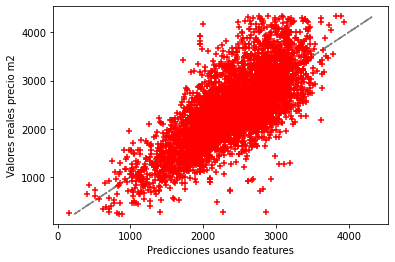

                            OLS Regression Results                            
Dep. Variable:          precio_m2_usd   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     254.1
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:49:41   Log-Likelihood:            -1.0864e+05
No. Observations:               14316   AIC:                         2.174e+05
Df Residuals:                   14246   BIC:                         2.179e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [101]:
mae1, rmse1 = statsmodel_linear(data, lr_all)

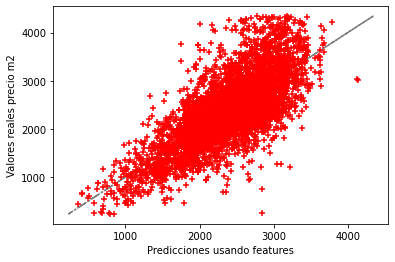

                            OLS Regression Results                            
Dep. Variable:          precio_m2_usd   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:49:54   Log-Likelihood:            -1.0858e+05
No. Observations:               14316   AIC:                         2.173e+05
Df Residuals:                   14246   BIC:                         2.178e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [102]:
mae2, rmse2 = statsmodel_linear(data, lr_all)

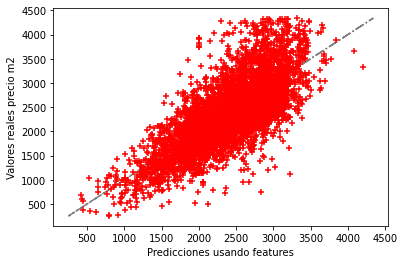

                            OLS Regression Results                            
Dep. Variable:          precio_m2_usd   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:50:03   Log-Likelihood:            -1.0865e+05
No. Observations:               14316   AIC:                         2.174e+05
Df Residuals:                   14246   BIC:                         2.180e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [103]:
mae3, rmse3 = statsmodel_linear(data, lr_all)

In [104]:
print('MAE promedio: ', (mae1 + mae2 + mae3) / 3)
print('R2  promedio: ', (rmse1 + rmse2 + rmse3) / 3)

MAE promedio:  368.5445460865051
R2  promedio:  0.5476774433109965


Vemos una leve mejoría del **R2**.

Lo siguiente, es tener en cuenta la correlación entre features. Para ello, tomaremos aquellas variables que tengan una correlación superior a **0.2**.

In [105]:
#superficie_total x patio 0.21
data['sup_patio'] = data['superficie_total'] * data['patio']
#superficie total x tipo_apartment -0.32
data['sup_ap'] = data['superficie_total'] * data['tipo_apartment']

lr_all.append('sup_ap')
lr_all.append('sup_patio')

Y volver a repetir el proceso:

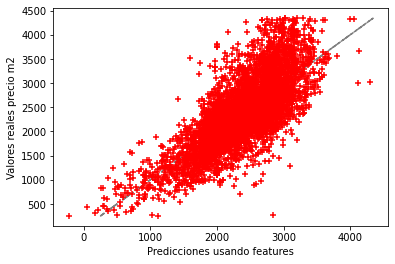

                            OLS Regression Results                            
Dep. Variable:          precio_m2_usd   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:11:21   Log-Likelihood:            -1.0854e+05
No. Observations:               14316   AIC:                         2.172e+05
Df Residuals:                   14244   BIC:                         2.178e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [106]:
mae1, rmse1 = statsmodel_linear(data, lr_all)

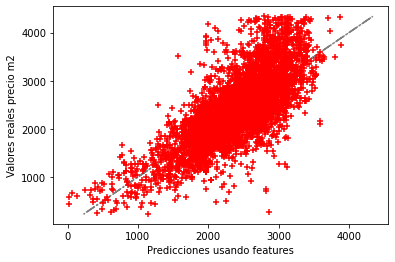

                            OLS Regression Results                            
Dep. Variable:          precio_m2_usd   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     253.6
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:11:38   Log-Likelihood:            -1.0848e+05
No. Observations:               14316   AIC:                         2.171e+05
Df Residuals:                   14244   BIC:                         2.176e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [107]:
mae2, rmse2 = statsmodel_linear(data, lr_all)

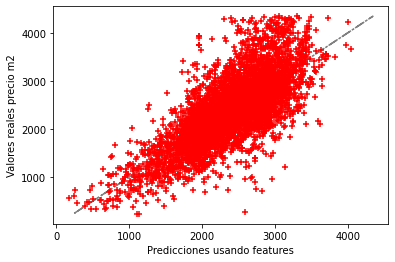

                            OLS Regression Results                            
Dep. Variable:          precio_m2_usd   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     258.7
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:11:49   Log-Likelihood:            -1.0849e+05
No. Observations:               14316   AIC:                         2.171e+05
Df Residuals:                   14244   BIC:                         2.177e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [108]:
mae3, rmse3 = statsmodel_linear(data, lr_all)

In [109]:
print('MAE promedio: ', (mae1 + mae2 + mae3) / 3)
print('R2  promedio: ', (rmse1 + rmse2 + rmse3) / 3)

MAE promedio:  363.61146664857193
R2  promedio:  0.5590672862833738


## Ridge

In [148]:
def train_test_ridge(data, feature_cols, alpha, graph=False):
    X = data[feature_cols]
    y = data.precio_m2_usd
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
    ridgemodel = linear_model.Ridge(alpha=alpha, normalize=True)
    ridgemodel.fit(X_train, y_train)
    y_pred = ridgemodel.predict(X_test)
    if graph:
        plt.plot(y_test,y_test, '-.', c='grey')
        plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
        plt.xlabel("Predicciones usando features")
        plt.ylabel("Valores reales precio m2")
        plt.show()
    print ("y_test sample: ", y_test.values[0:10])
    print ("y_pred sample: ", y_pred[0:10].astype(int))
    print ('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE: ', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:  ', metrics.r2_score(y_test, y_pred))
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

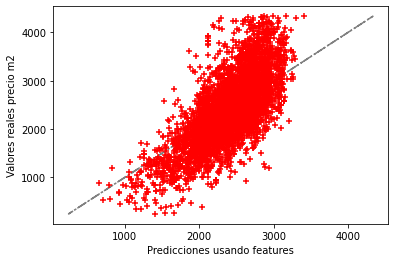

y_test sample:  [2276.59574468 2194.44444444 1695.65217391 2395.83333333 2948.71794872
 2820.51282051 3017.85714286 3250.         3423.07692308 2485.71428571]
y_pred sample:  [2408 2176 2160 2783 2574 2753 2738 2870 2920 2392]
MAE:  384.1989592372041
MSE:  247627.23898837197
RMSE: 497.6215821167446
R2:   0.48659519378003413

y_test sample:  [2478.26086957 1875.         1666.66666667 2177.41935484 2843.1372549
 2178.04878049 2583.33333333 3560.         2475.72815534 1775.51020408]
y_pred sample:  [2616 2356 2231 2277 2425 2590 2038 2409 2502 2059]
MAE:  389.75182682178047
MSE:  255637.82807665618
RMSE: 505.60639639610594
R2:   0.5026198138455702

y_test sample:  [2470.58823529 1220.93023256 3062.5        2645.83333333 2538.46153846
 2282.05128205 2407.40740741 2656.25        996.         2916.35114286]
y_pred sample:  [2422 2013 2783 2011 2809 2011 2160 2379 1732 2740]
MAE:  385.1503447740013
MSE:  253616.58923235635
RMSE: 503.60360327578707
R2:   0.5055277942623942


In [149]:
lr_all = features_lr + localidades_lr
_ = train_test_ridge(data, lr_all, 0.5, True)
print("")
_ = train_test_ridge(data, lr_all, 0.5)
print("")
_ = train_test_ridge(data, lr_all, 0.5)

La efectividad del modelo baja un poco si la comparamos con el resultado de nuestro modelo original.

## RidgeCV

In [163]:
def train_test_ridgecv(data, feature_cols, graph=False):
    X = data[feature_cols]
    y = data.precio_m2_usd
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
    model = linear_model.RidgeCV(alphas=np.linspace(0.01,100, 1000), cv=3, normalize=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if graph:
        plt.plot(y_test,y_test, '-.', c='grey')
        plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
        plt.xlabel("Predicciones usando features")
        plt.ylabel("Valores reales precio m2")
        plt.show()
    print ("y_test sample: ", y_test.values[0:10])
    print ("y_pred sample: ", y_pred[0:10].astype(int))
    print ('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE: ', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:  ', metrics.r2_score(y_test, y_pred))
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

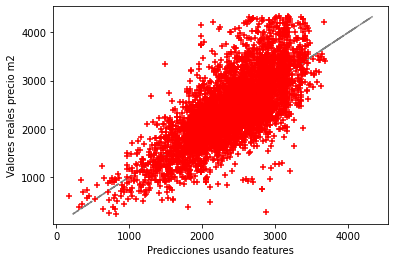

y_test sample:  [2180.         2796.0952381  2588.21052632 1970.         2907.32432432
 2439.15686275 2390.24390244 1684.7826087  2079.20792079 2836.78431373]
y_pred sample:  [1963 2776 3317 1996 2843 2438 2914 1865 2293 2582]
MAE:  370.6944088847444
MSE:  234252.22103564395
RMSE: 483.99609609545814
R2:   0.5325042669534046

y_test sample:  [1960.52631579 2250.         2520.33333333 2861.53846154 2405.40540541
 2150.         1162.79069767 2754.14285714 2065.78947368 3232.55813953]
y_pred sample:  [1979 3004 2661 2404 2175 2790 1797 2770 1915 2875]
MAE:  362.17592796726336
MSE:  223429.6358100647
RMSE: 472.68344143841625
R2:   0.5643039493005872

y_test sample:  [3440.90166667 4000.         1989.58333333 3173.82857143 3226.92307692
 3854.16666667 3331.47771429 2209.30232558 2791.9        1900.        ]
y_pred sample:  [3238 3170 2129 2800 2827 2841 3082 1760 2927 2517]
MAE:  362.4179628513467
MSE:  229736.87043847653
RMSE: 479.30874229297814
R2:   0.5471075421587129


In [160]:
lr_all = features_lr + localidades_lr
_ = train_test_ridgecv(data, lr_all, True)
print("")
_ = train_test_ridgecv(data, lr_all)
print("")
_ = train_test_ridgecv(data, lr_all)

La efectividad del modelo es buena, pero no podemos concluir que sea mejor que la del modelo original.

## Lasso

In [164]:
def train_test_lasso(data, feature_cols, graph=False):
    X = data[feature_cols]
    y = data.precio_m2_usd
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
    model = linear_model.LassoCV(alphas=np.linspace(0.01,100, 1000), cv=3, normalize=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if graph:
        plt.plot(y_test,y_test, '-.', c='grey')
        plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
        plt.xlabel("Predicciones usando features")
        plt.ylabel("Valores reales precio m2")
        plt.show()
    print ("y_test sample: ", y_test.values[0:10])
    print ("y_pred sample: ", y_pred[0:10].astype(int))
    print ('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE: ', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:  ', metrics.r2_score(y_test, y_pred))
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

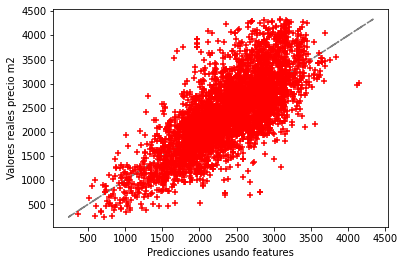

y_test sample:  [1933.33333333 3089.23076923 1026.19444444 3604.16666667 1000.
 2543.85964912 2979.54545455 3444.44444444 2263.15789474 1953.125     ]
y_pred sample:  [2297 2434 2380 3461 1540 2475 2919 2535 2952 1701]
MAE:  364.3618035153649
MSE:  225738.64505569835
RMSE: 475.1196113145598
R2:   0.5568544040919163

y_test sample:  [1397.72727273 3225.80645161 1309.09090909 2471.26436782 3055.55555556
 3181.81818182 2489.79591837 1884.21052632 2390.         2200.        ]
y_pred sample:  [1788 3191 2539 2270 2654 1869 2269 2075 2772 2594]
MAE:  369.09391609007105
MSE:  230424.32987439455
RMSE: 480.0253429501348
R2:   0.549564682422085

y_test sample:  [1976.47058824 3600.         2519.60784314 2409.09090909 2156.57142857
 1441.44144144 2680.         1370.96774194 2704.08163265 1944.44444444]
y_pred sample:  [2291 3059 2898 2025 2267 2539 2737 1465 3137 1486]
MAE:  374.5053827049027
MSE:  237474.52193303636
RMSE: 487.31357659420524
R2:   0.547018848821202


In [162]:
lr_all = features_lr + localidades_lr
_ = train_test_lasso(data, lr_all, True)
print("")
_ = train_test_lasso(data, lr_all)
print("")
_ = train_test_lasso(data, lr_all)

Nuevamente, la efectividad del modelo es buena pero no podemos concluir que sea mejor que la del modelo original dado que la variabilidad es similar a la del modelo original.